In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(10)


In [2]:
# Input

In [3]:
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]-pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
            
    return np.array(inputs), np.array(labels).reshape(n, 1)


In [4]:
def generate_XOR_easy():
    inputs = []
    labels = []
    
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i ==0.5:
            continue
            
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
        
    return np.array(inputs), np.array(labels).reshape(21, 1)


In [5]:
# Show result

In [6]:
def show_result(x, y, pred_y):
    plt.subplot(1,2,1)
    plt.title('Ground turth', fontsize=18)
    
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
            
    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize=18)
    
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
            
    plt.show
            

In [18]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random.random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random.random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)    
    return network
 
# Calculate neuron activation for an input
def weighted_sum(weights, inputs):
    z = weights[-1]
    for i in range(len(weights)-1):
        z += weights[i] * inputs[i]
    return z
 
# Transfer neuron activation
def activation(x, f='sigmoid'):
    if f == 'sigmoid':
        return 1.0/(1.0+np.exp(-x))
    if f == 'None':
        return 1.0 * x
    if f == 'tanh':
        return np.tanh(x)
    if f == "ReLU":
        return np.maximum(0, x)
    if f == "leaky_ReLU":
        if x>=0:
            return x
        else:
            return 0.001*x
        
# Calculate the derivative of an neuron output
def derivative_activation(x, f='sigmoid'):
    if f == 'sigmoid':
        return np.multiply(x,1.0-x)
    if f == 'None':
        return 1.0
    if f == 'tanh':
        return 1.0 - x ** 2
    if f == "ReLU":
        return 1.0 * (x > 0)
    if f == "leaky_ReLU":
        if x>=0:
            return 1
        else:
            return 0.001
        
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            z = weighted_sum(neuron['weights'], inputs)
            neuron['output'] = activation(z, 'sigmoid')
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(neuron['output'] - expected[j])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * derivative_activation(neuron['output'], 'sigmoid')
            
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] -= l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, dataset, l_rate, n_epoch, n_outputs):
    loss_list = []    
    for epoch in range(n_epoch):
        sum_error = 0      
        for row in dataset:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[int(row[-1])] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            sum_error = sum_error/len(dataset[0])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
            
        loss_list.append(sum_error)
        if epoch%500==0:
            print('epoch %4d    loss : %.5f' % (epoch, sum_error))
            
    plt.plot(loss_list, marker="s")
    plt.title('Learning curve')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    #print('%.8f' % outputs[1])
    return outputs.index(max(outputs)), outputs[1]


In [19]:
x, y = generate_linear(n=100)
#x, y = generate_XOR_easy()

epoch    0    loss : 0.34632
epoch  500    loss : 0.13767
epoch 1000    loss : 0.01617
epoch 1500    loss : 0.01028
epoch 2000    loss : 0.00841
epoch 2500    loss : 0.00734
epoch 3000    loss : 0.00661
epoch 3500    loss : 0.00606
epoch 4000    loss : 0.00562
epoch 4500    loss : 0.00526
epoch 5000    loss : 0.00496
epoch 5500    loss : 0.00470
epoch 6000    loss : 0.00447
epoch 6500    loss : 0.00427
epoch 7000    loss : 0.00409
epoch 7500    loss : 0.00393
epoch 8000    loss : 0.00379
epoch 8500    loss : 0.00365
epoch 9000    loss : 0.00353
epoch 9500    loss : 0.00341


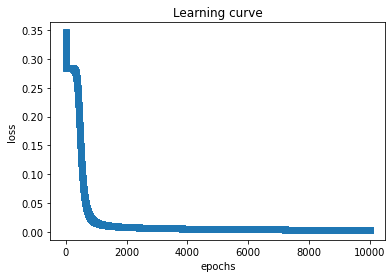

In [20]:
dataset = np.hstack((x,y))

n_inputs = len(x[0])
n_outputs = len(set([i[0] for i in y]))
n_hidden = 2

network = initialize_network(n_inputs, n_hidden, n_outputs)

l_rate = 0.01
n_epoch = 10000

train_network(network, dataset, l_rate, n_epoch, n_outputs)


In [21]:
network1 = list()
for layer in network:
    #print(layer[0]['weights'], layer[1]['weights'])
    hidden_layer = [{'weights':layer[i]['weights']} for i in range(len(layer))]
    network1.append(hidden_layer)
#print(network1)

In [22]:
count = 0
pre_y = []
for row in dataset:
    prediction, output = predict(network1, row)
    print('%.8f   label = %d  predict = %d' % (output, row[-1], prediction))
    #print(prediction)
    pre_y.append(prediction)
    if row[-1] == prediction:
        count += 1
print('\nAccuracy : ', count/len(dataset))
        

0.00147180   label = 0  predict = 0
0.00023831   label = 0  predict = 0
0.99964383   label = 1  predict = 1
0.00021594   label = 0  predict = 0
0.00036018   label = 0  predict = 0
0.99986156   label = 1  predict = 1
0.99986014   label = 1  predict = 1
0.99986094   label = 1  predict = 1
0.00020150   label = 0  predict = 0
0.01940991   label = 0  predict = 0
0.99962789   label = 1  predict = 1
0.99973695   label = 1  predict = 1
0.00059347   label = 0  predict = 0
0.99941546   label = 1  predict = 1
0.00045072   label = 0  predict = 0
0.99910116   label = 1  predict = 1
0.99977814   label = 1  predict = 1
0.97195110   label = 1  predict = 1
0.99946674   label = 1  predict = 1
0.13681947   label = 0  predict = 0
0.00743499   label = 0  predict = 0
0.00013935   label = 0  predict = 0
0.00016889   label = 0  predict = 0
0.04422092   label = 0  predict = 0
0.99980657   label = 1  predict = 1
0.99979791   label = 1  predict = 1
0.99895100   label = 1  predict = 1
0.99783007   label = 1  pred

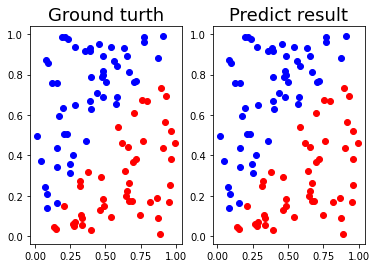

In [23]:
show_result(x, y, pre_y)

In [24]:
x, y = generate_XOR_easy()

epoch    0    loss : 0.26686
epoch  500    loss : 0.26378
epoch 1000    loss : 0.02751
epoch 1500    loss : 0.00235
epoch 2000    loss : 0.00074
epoch 2500    loss : 0.00040
epoch 3000    loss : 0.00026
epoch 3500    loss : 0.00019
epoch 4000    loss : 0.00015
epoch 4500    loss : 0.00012
epoch 5000    loss : 0.00010
epoch 5500    loss : 0.00009
epoch 6000    loss : 0.00008
epoch 6500    loss : 0.00007
epoch 7000    loss : 0.00006
epoch 7500    loss : 0.00006
epoch 8000    loss : 0.00005
epoch 8500    loss : 0.00005
epoch 9000    loss : 0.00004
epoch 9500    loss : 0.00004


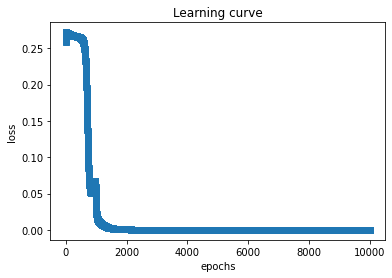

In [25]:
dataset = np.hstack((x,y))

n_inputs = len(x[0])
n_outputs = len(set([i[0] for i in y]))
n_hidden = 2

network = initialize_network(n_inputs, n_hidden, n_outputs)

l_rate = 0.3
n_epoch = 10000

train_network(network, dataset, l_rate, n_epoch, n_outputs)


In [26]:
network1 = list()
for layer in network:
    #print(layer[0]['weights'], layer[1]['weights'])
    hidden_layer = [{'weights':layer[i]['weights']} for i in range(len(layer))]
    network1.append(hidden_layer)
#print(network1)

In [27]:
count = 0
pre_y = []
for row in dataset:
    prediction, output = predict(network1, row)
    print('%.8f   label = %d  predict = %d' % (output, row[-1], prediction))
    #print(prediction)
    pre_y.append(prediction)
    if row[-1] == prediction:
        count += 1
print('\nAccuracy : ', count/len(dataset))
        

0.01234163   label = 0  predict = 0
0.99789725   label = 1  predict = 1
0.01231613   label = 0  predict = 0
0.99789689   label = 1  predict = 1
0.01229071   label = 0  predict = 0
0.99788718   label = 1  predict = 1
0.01226536   label = 0  predict = 0
0.99760945   label = 1  predict = 1
0.01224007   label = 0  predict = 0
0.96735528   label = 1  predict = 1
0.01221486   label = 0  predict = 0
0.01218972   label = 0  predict = 0
0.97190743   label = 1  predict = 1
0.01216465   label = 0  predict = 0
0.99863826   label = 1  predict = 1
0.01213965   label = 0  predict = 0
0.99879935   label = 1  predict = 1
0.01211471   label = 0  predict = 0
0.99880417   label = 1  predict = 1
0.01208985   label = 0  predict = 0
0.99880432   label = 1  predict = 1

Accuracy :  1.0


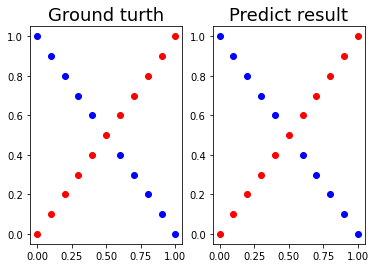

In [28]:
show_result(x, y, pre_y)